    product  total_qty  revenue
0    Apples         40    100.0
1   Bananas        105    189.0
2     Bread         55    110.0
3    Butter          8     36.0
4    Cheese         17     85.0
5      Eggs        110     33.0
6      Milk         32     48.0
7   Oranges         30     90.0
8  Potatoes         35     31.5
9  Tomatoes         40     48.0


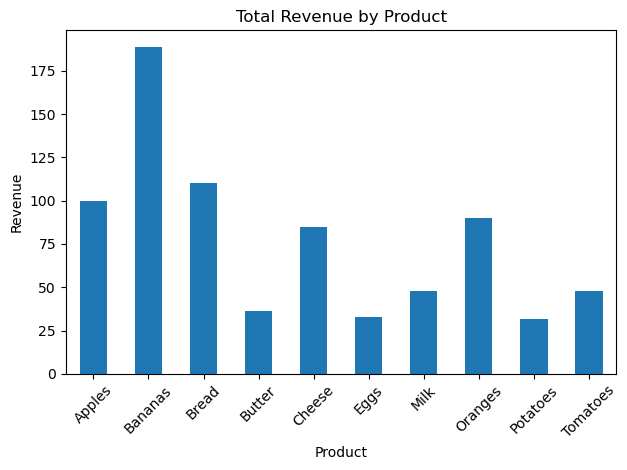

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create SQLite database and sales table
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    product TEXT,
    category TEXT,
    customer TEXT,
    quantity INTEGER,
    price REAL
)
''')

new_sample_data = [
    ('2024-04-06', 'Apples', 'Fruit', 20, 2.5, 'Arjun', 'Credit Card'),
    ('2024-04-07', 'Bananas', 'Fruit', 30, 1.8, 'Priya', 'GPay'),
    ('2024-04-08', 'Oranges', 'Fruit', 15, 3.0, 'Akash', 'Debit Card'),
    ('2024-04-09', 'Milk', 'Dairy', 10, 1.5, 'Chari','Credit Card'),
    ('2024-04-10', 'Cheese', 'Dairy', 5, 5.0, 'Pari', 'Cash'),
    ('2024-04-15', 'Apples', 'Fruit', 20, 2.5, 'Arun', 'Cash'),
    ('2024-04-10', 'Bananas', 'Fruit', 30, 1.8, 'Priyanka', 'PayPal'),
    ('2024-04-07', 'Oranges', 'Fruit', 15, 3.0, 'Akashaya', 'Debit Card'),
    ('2024-04-09', 'Milk', 'Dairy', 10, 1.5, 'Charitha', 'Cash'),
    ('2024-04-10', 'Cheese', 'Dairy', 5, 5.0, 'Piyush', 'Cash'),   # <-- Comma added here!
    ('2024-04-11', 'Bread', 'Bakery', 25, 2.0, 'Meera', 'UPI'),
    ('2024-04-12', 'Butter', 'Dairy', 8, 4.5, 'Ankit', 'Credit Card'),
    ('2024-04-13', 'Eggs', 'Poultry', 50, 0.3, 'Sneha', 'Debit Card'),
    ('2024-04-14', 'Tomatoes', 'Vegetables', 40, 1.2, 'Ravi', 'GPay'),
    ('2024-04-15', 'Potatoes', 'Vegetables', 35, 0.9, 'Divya', 'Cash'),
    ('2024-04-16', 'Bread', 'Bakery', 30, 2.0, 'Nikhil', 'UPI'),
    ('2024-04-17', 'Eggs', 'Poultry', 60, 0.3, 'Aditi', 'Paytm'),
    ('2024-04-18', 'Milk', 'Dairy', 12, 1.5, 'Ishaan', 'Credit Card'),
    ('2024-04-19', 'Cheese', 'Dairy', 7, 5.0, 'Ritika', 'UPI'),
    ('2024-04-20', 'Bananas', 'Fruit', 45, 1.8, 'Kiran', 'PayPal')
]
cursor.execute('ALTER TABLE sales ADD COLUMN customer_name TEXT')
cursor.execute('ALTER TABLE sales ADD COLUMN payment_method TEXT')


# Insert new data into the sales table
cursor.executemany('''
INSERT INTO sales (date, product, category, quantity, price, customer, payment_method) 
VALUES (?, ?, ?, ?, ?, ?, ?)

''', new_sample_data)

# Commit the changes
conn.commit()

# Step 3: Query the sales data to summarize by product
query = '''
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
print(df)

# Step 4: Visualize total revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False)

plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


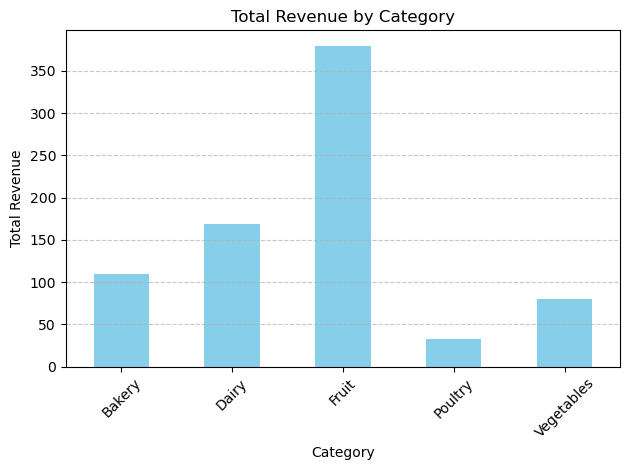

In [10]:
#Total Revenue by Category

import matplotlib.pyplot as plt

# Plotting total revenue by category
df_category.plot(kind='bar', x='category', y='total_revenue', color='skyblue', legend=False)

plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()




  payment_method  transactions
0           Cash             5
1    Credit Card             4
2     Debit Card             3
3           GPay             2
4         PayPal             2
5          Paytm             1
6            UPI             3


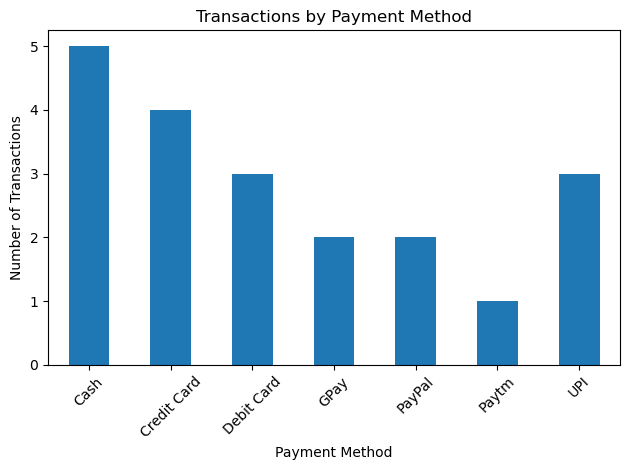

In [5]:
#Payment Method Usage
query = '''
SELECT payment_method, COUNT(*) AS transactions 
FROM sales 
GROUP BY payment_method
'''

df_payment = pd.read_sql_query(query, conn)
print(df_payment)

df_payment.plot(kind='bar', x='payment_method', y='transactions', legend=False)
plt.title('Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



    customer  total_spent
0      Kiran         81.0
1     Nikhil         60.0
2   Priyanka         54.0
3      Priya         54.0
4      Meera         50.0
5       Arun         50.0
6      Arjun         50.0
7       Ravi         48.0
8   Akashaya         45.0
9      Akash         45.0
10     Ankit         36.0
11    Ritika         35.0
12     Divya         31.5
13    Piyush         25.0
14      Pari         25.0
15    Ishaan         18.0
16     Aditi         18.0
17     Sneha         15.0
18  Charitha         15.0
19     Chari         15.0


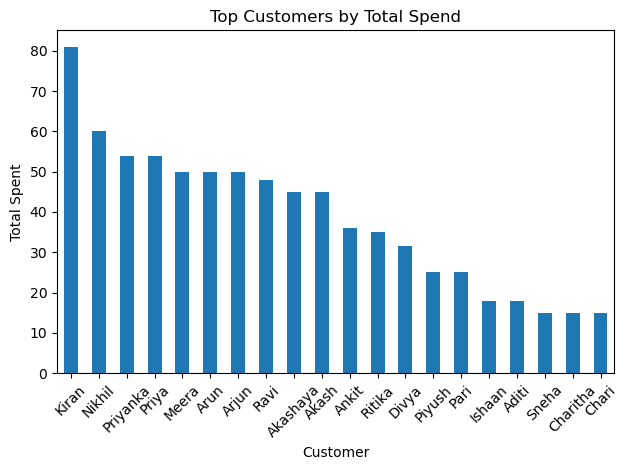

In [6]:

#Top Customers by Spend
query = '''
SELECT customer, 
       SUM(quantity * price) AS total_spent 
FROM sales 
GROUP BY customer 
ORDER BY total_spent DESC
'''

df_customers = pd.read_sql_query(query, conn)
print(df_customers)

df_customers.plot(kind='bar', x='customer', y='total_spent', legend=False)
plt.title('Top Customers by Total Spend')
plt.xlabel('Customer')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


          date  daily_revenue
0   2024-04-06           50.0
1   2024-04-07           99.0
2   2024-04-08           45.0
3   2024-04-09           30.0
4   2024-04-10          104.0
5   2024-04-11           50.0
6   2024-04-12           36.0
7   2024-04-13           15.0
8   2024-04-14           48.0
9   2024-04-15           81.5
10  2024-04-16           60.0
11  2024-04-17           18.0
12  2024-04-18           18.0
13  2024-04-19           35.0
14  2024-04-20           81.0


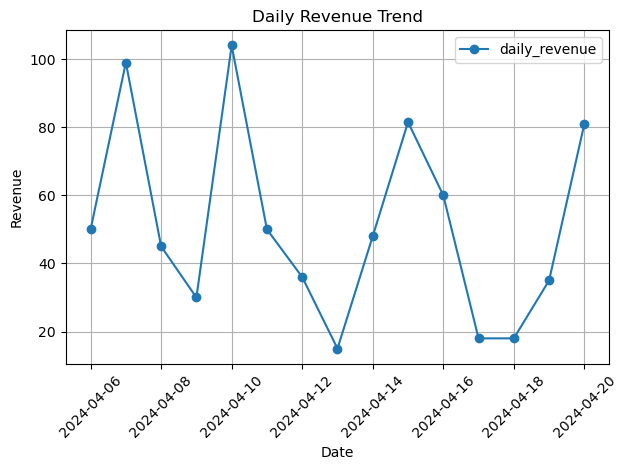

In [7]:
#Daily Sales Trend

query = '''
SELECT date, SUM(quantity * price) AS daily_revenue 
FROM sales 
GROUP BY date
ORDER BY date
'''

df_trend = pd.read_sql_query(query, conn)
print(df_trend)

df_trend.plot(kind='line', x='date', y='daily_revenue', marker='o')
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


    product  total_quantity
0      Eggs             110
1   Bananas             105
2     Bread              55
3  Tomatoes              40
4    Apples              40
5  Potatoes              35
6      Milk              32
7   Oranges              30
8    Cheese              17
9    Butter               8


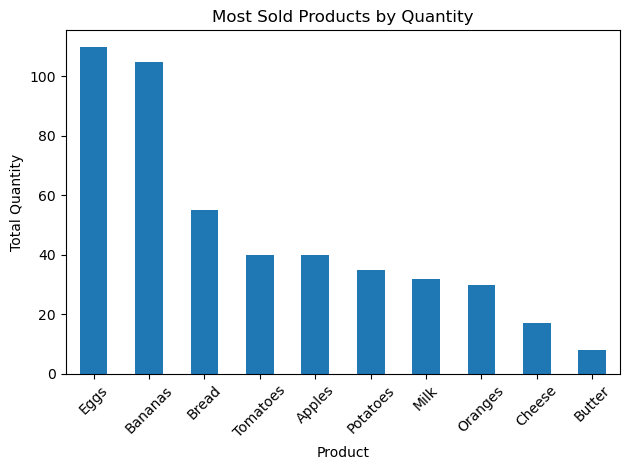

In [8]:
#  Most Sold Product by Quantity

query = '''
SELECT product, SUM(quantity) AS total_quantity 
FROM sales 
GROUP BY product 
ORDER BY total_quantity DESC
'''

df_most_sold = pd.read_sql_query(query, conn)
print(df_most_sold)

df_most_sold.plot(kind='bar', x='product', y='total_quantity', legend=False)
plt.title('Most Sold Products by Quantity')
plt.xlabel('Product')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('sales_data.db')

# Total Revenue by Product
query1 = '''
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''
df_product = pd.read_sql_query(query1, conn)
df_product.plot(kind='bar', x='product', y='revenue', color='teal', legend=False)
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_revenue_by_product.png')
plt.close()

# Total Revenue by Category
query2 = '''
SELECT category, SUM(quantity * price) AS total_revenue 
FROM sales 
GROUP BY category
'''
df_category = pd.read_sql_query(query2, conn)
df_category.plot(kind='bar', x='category', y='total_revenue', color='skyblue', legend=False)
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_revenue_by_category.png')
plt.close()

# Payment Method Usage
query3 = '''
SELECT payment_method, COUNT(*) AS count 
FROM sales 
GROUP BY payment_method
'''
df_payment = pd.read_sql_query(query3, conn)
df_payment.plot(kind='pie', y='count', labels=df_payment['payment_method'], autopct='%1.1f%%', legend=False)
plt.title('Payment Method Usage')
plt.ylabel('')
plt.tight_layout()
plt.savefig('payment_method_usage.png')
plt.close()

# Top Customers by Spend
query4 = '''
SELECT customer, SUM(quantity * price) AS total_spent 
FROM sales 
GROUP BY customer
ORDER BY total_spent DESC
LIMIT 5
'''
df_customers = pd.read_sql_query(query4, conn)
df_customers.plot(kind='bar', x='customer', y='total_spent', color='coral', legend=False)
plt.title('Top Customers by Spend')
plt.xlabel('Customer')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_customers_by_spend.png')
plt.close()

# Daily Sales Trend
query5 = '''
SELECT date, SUM(quantity * price) AS daily_sales 
FROM sales 
GROUP BY date
ORDER BY date
'''
df_daily = pd.read_sql_query(query5, conn)
df_daily.plot(kind='line', x='date', y='daily_sales', marker='o', color='green')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('daily_sales_trend.png')
plt.close()

# Most Sold Product by Quantity
query6 = '''
SELECT product, SUM(quantity) AS total_quantity 
FROM sales 
GROUP BY product 
ORDER BY total_quantity DESC
LIMIT 1
'''
df_most_sold = pd.read_sql_query(query6, conn)
print("Most Sold Product by Quantity:")
print(df_most_sold)

# Close the connection
conn.close()


Most Sold Product by Quantity:
  product  total_quantity
0    Eggs             110
